In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [2]:
df = pd.read_csv(r"C:\Users\Mohammad El Hakawati\Downloads\room+occupancy+estimation\Occupancy_Estimation.csv")

# EDA

In [3]:
df.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [4]:
df['Room_Occupancy_Count'].value_counts()

Room_Occupancy_Count
0    8228
2     748
3     694
1     459
Name: count, dtype: int64

In [5]:
print(df.groupby(['Date', 'Room_Occupancy_Count'])['Room_Occupancy_Count'].count())

Date        Room_Occupancy_Count
2017/12/22  0                        637
            1                        205
            2                        257
            3                        363
2017/12/23  0                       1997
            1                        254
            2                        398
            3                        130
2017/12/24  0                       1064
2017/12/25  0                       1716
2017/12/26  0                       1063
2018/01/10  0                        703
            2                         93
            3                        201
2018/01/11  0                       1048
Name: Room_Occupancy_Count, dtype: int64


In [6]:
df.drop("Date",axis=1,inplace=True)

In [7]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce')
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Second'] = df['Time'].dt.second
df.drop(['Time'],axis=1,inplace = True)

In [8]:
x=df.drop('Room_Occupancy_Count',axis=1)
y=df['Room_Occupancy_Count']

In [9]:
scaler = StandardScaler()
x_stan = scaler.fit_transform(x)

In [10]:
print(df.groupby(['S6_PIR', 'S7_PIR','Room_Occupancy_Count'])['Room_Occupancy_Count'].count())

S6_PIR  S7_PIR  Room_Occupancy_Count
0       0       0                       8204
                1                        297
                2                        270
                3                        160
        1       0                          4
                1                          4
                2                        120
                3                        157
1       0       0                         12
                1                        143
                2                        158
                3                         79
        1       0                          8
                1                         15
                2                        200
                3                        298
Name: Room_Occupancy_Count, dtype: int64


# feature importance

In [11]:
FI_model = RandomForestClassifier(random_state=42)
FI_model.fit(x,y)
feature_importance = FI_model.feature_importances_
sorted_indices = np.argsort(feature_importance)[::-1]
for i in sorted_indices:
    print(f"{x.columns[i]}\t\t{feature_importance[i]}")

S1_Light		0.2067896219650405
S2_Light		0.1360491766094839
S5_CO2_Slope		0.11412579099290888
S3_Light		0.10782620598220968
S1_Sound		0.1071176397879323
S2_Sound		0.07376424038092666
S5_CO2		0.03982339533055001
S2_Temp		0.03429272306736204
S4_Light		0.03350602478383671
S1_Temp		0.02900323720868207
S3_Sound		0.02755834402967968
S3_Temp		0.025855600565306315
S4_Temp		0.01728691487087118
S4_Sound		0.01625865749026983
Hour		0.011063488320645182
S7_PIR		0.008523377100266094
S6_PIR		0.0057511495016572284
Minute		0.0038962939420128183
Second		0.001508118070358912


In [12]:
df.drop(['Minute','Second'],axis=1,inplace=True)

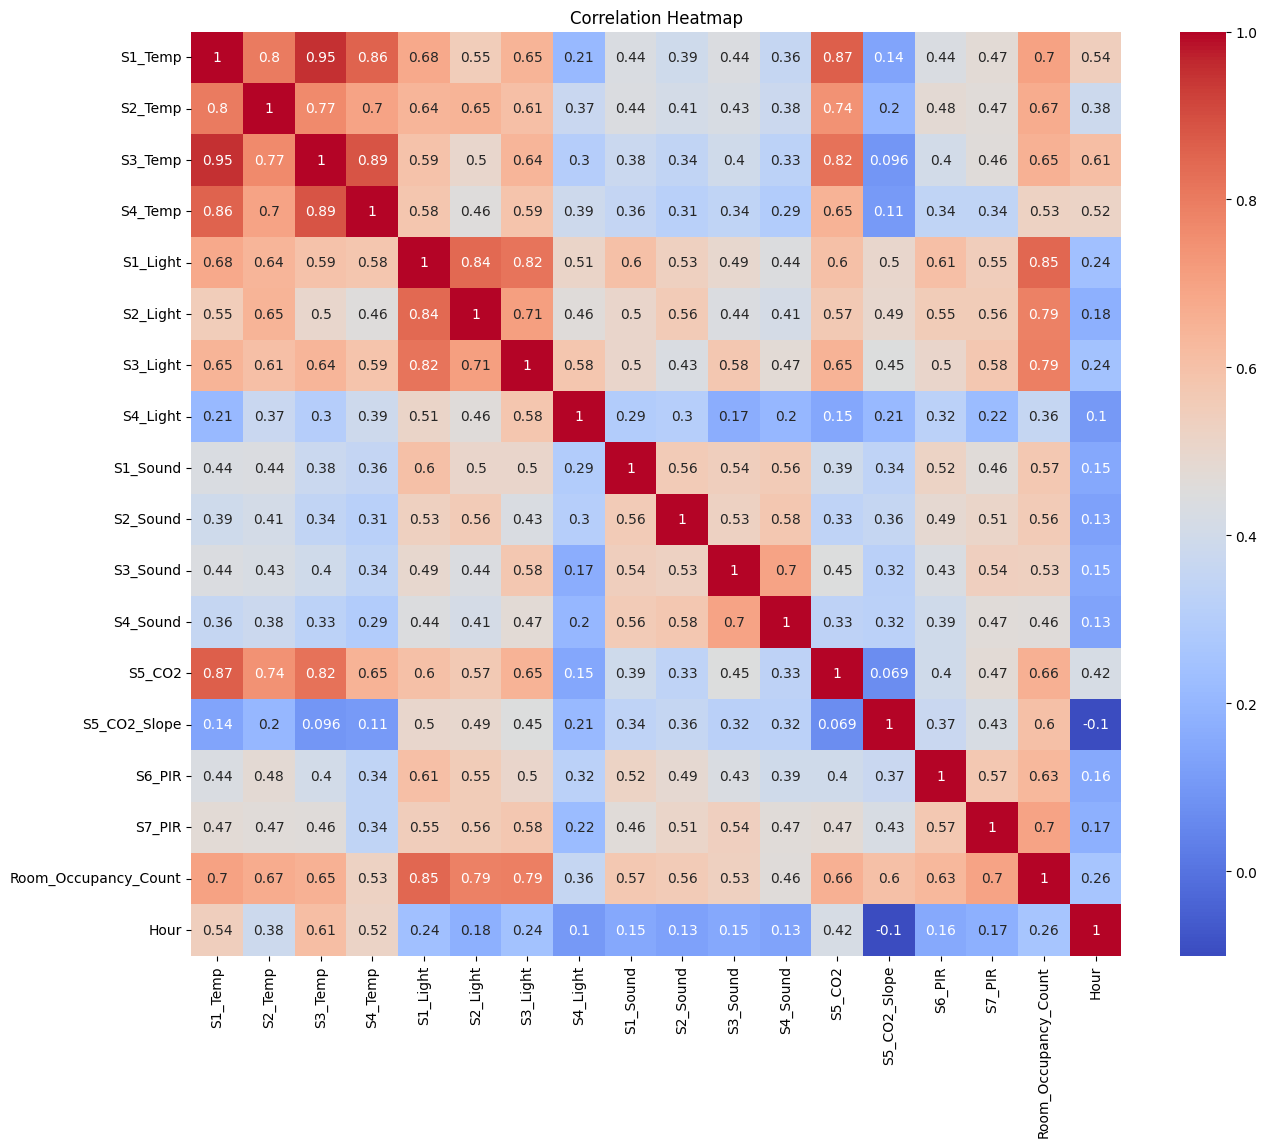

In [13]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Algorithms

## Random Forest

In [14]:
rf_model = RandomForestClassifier()

### RF

In [15]:
sum_RF_acc = []
sum_RF_pre = []
sum_RF_rec = []
sum_RF_f1 = []
iteration=10
for i in range(iteration):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=i)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    sum_RF_acc.append(acc)
    rec = recall_score(y_test,y_pred,average='macro')
    sum_RF_rec.append(rec)
    pre =  precision_score(y_test,y_pred,average='macro')
    sum_RF_pre.append(pre)
    f1 = f1_score(y_test,y_pred,average='macro')
    sum_RF_f1.append(f1)

avg_RF_acc=sum(sum_RF_acc)/iteration *100
avg_RF_rec=sum(sum_RF_rec)/iteration *100
avg_RF_pre=sum(sum_RF_pre)/iteration *100
avg_RF_f1=sum(sum_RF_f1)/iteration *100

print('Average Accuracy:',avg_RF_acc )
print('Average Recall:', avg_RF_rec)
print('Average Precision:', avg_RF_pre)
print('Average F1-Score:', avg_RF_f1)

Average Accuracy: 99.78681405448084
Average Recall: 99.22381310924658
Average Precision: 99.25472720411668
Average F1-Score: 99.23628797154073


### Random forest with standerization

In [16]:
sum_RF_acc = []
sum_RF_pre = []
sum_RF_rec = []
sum_RF_f1 = []
iteration=10
for i in range(iteration):
    X_train, X_test, y_train, y_test = train_test_split(x_stan, y, test_size=0.25,random_state=i)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    sum_RF_acc.append(acc)
    rec = recall_score(y_test,y_pred,average='macro')
    sum_RF_rec.append(rec)
    pre =  precision_score(y_test,y_pred,average='macro')
    sum_RF_pre.append(pre)
    f1 = f1_score(y_test,y_pred,average='macro')
    sum_RF_f1.append(f1)

avg_RF_acc_STA=sum(sum_RF_acc)/iteration *100
avg_RF_rec_STA=sum(sum_RF_rec)/iteration *100
avg_RF_pre_STA=sum(sum_RF_pre)/iteration *100
avg_RF_f1_STA=sum(sum_RF_f1)/iteration *100

print('Average Accuracy:',avg_RF_acc_STA )
print('Average Recall:', avg_RF_rec_STA)
print('Average Precision:', avg_RF_pre_STA)
print('Average F1-Score:', avg_RF_f1_STA)

Average Accuracy: 99.74338728780101
Average Recall: 99.09131210499503
Average Precision: 99.07398582917162
Average F1-Score: 99.07847047651096


### Random forest with Grid search

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x_stan, y, test_size=0.25, random_state=42)
rf_param_grid = {
    'n_estimators': [10,20,40],
    'criterion':["gini", "entropy", "log_loss"],
    'max_depth': [ 10, 20,40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
    }
rf_grid_search = GridSearchCV(rf_model, rf_param_grid,n_jobs=-1, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_train)
y_pred=rf_grid_search.predict(X_test)

RF_acc_GS=accuracy_score(y_test,y_pred) *100
RF_rec_GS=recall_score(y_test,y_pred,average='macro') *100
RF_pre_GS=precision_score(y_test,y_pred,average='macro') *100
RF_f1_GS=f1_score(y_test,y_pred,average='macro') *100
print("Best Hyperparameters for Random Forest:", rf_grid_search.best_params_)

Best Hyperparameters for Random Forest: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 40}


## SVC

In [18]:
SVC_model = SVC()

### SVC

In [19]:
sum_SVC_acc = []
sum_SVC_pre = []
sum_SVC_rec = []
sum_SVC_f1 = []
iteration=10
for i in range(iteration):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=i)
    SVC_model.fit(X_train, y_train)
    y_pred = SVC_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    sum_SVC_acc.append(acc)
    rec = recall_score(y_test,y_pred,average='macro')
    sum_SVC_rec.append(rec)
    pre =  precision_score(y_test,y_pred,average='macro')
    sum_SVC_pre.append(pre)
    f1 = f1_score(y_test,y_pred,average='macro')
    sum_SVC_f1.append(f1)

avg_SVC_acc=sum(sum_SVC_acc)/iteration *100
avg_SVC_rec=sum(sum_SVC_rec)/iteration *100
avg_SVC_pre=sum(sum_SVC_pre)/iteration *100
avg_SVC_f1=sum(sum_SVC_f1)/iteration *100

print('Average Accuracy:',avg_SVC_acc )
print('Average Recall:', avg_SVC_rec)
print('Average Precision:', avg_SVC_pre)
print('Average F1-Score:', avg_SVC_f1)

Average Accuracy: 97.41808132649034
Average Recall: 90.76637161073957
Average Precision: 96.05371530175256
Average F1-Score: 93.18301164252865


### SVC with standerization

In [20]:
sum_SVC_acc = []
sum_SVC_pre = []
sum_SVC_rec = []
sum_SVC_f1 = []
iteration=10
for i in range(iteration):
    X_train, X_test, y_train, y_test = train_test_split(x_stan, y, test_size=0.25,random_state=i)
    SVC_model.fit(X_train, y_train)
    y_pred = SVC_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    sum_SVC_acc.append(acc)
    rec = recall_score(y_test,y_pred,average='macro')
    sum_SVC_rec.append(rec)
    pre =  precision_score(y_test,y_pred,average='macro')
    sum_SVC_pre.append(pre)
    f1 = f1_score(y_test,y_pred,average='macro')
    sum_SVC_f1.append(f1)

avg_SVC_acc_STA=sum(sum_SVC_acc)/iteration *100
avg_SVC_rec_STA=sum(sum_SVC_rec)/iteration *100
avg_SVC_pre_STA=sum(sum_SVC_pre)/iteration *100
avg_SVC_f1_STA=sum(sum_SVC_f1)/iteration *100

print('Average Accuracy:',avg_SVC_acc_STA )
print('Average Recall:', avg_SVC_rec_STA)
print('Average Precision:', avg_SVC_pre_STA)
print('Average F1-Score:', avg_SVC_f1_STA)

Average Accuracy: 99.41176470588235
Average Recall: 98.04408430512878
Average Precision: 98.02880851144388
Average F1-Score: 98.02875567994654


### SVC with grid search

In [21]:
param_grid = {
    'kernel': ['linear', 'rbf','poly','sigmoid'],
    'C': [1, 10,100],
    'degree':[3,4,5],
    'coef0':[-1,0,1],
    'class_weight':[{0:1,1:1},"balanced"]
}
SVC_grid_search = GridSearchCV(SVC_model, param_grid, cv=5, scoring='accuracy')
SVC_grid_search.fit(x_stan, y)
y_pred=SVC_grid_search.predict(X_test)

SVC_acc_GS=accuracy_score(y_test,y_pred) *100
SVC_rec_GS=recall_score(y_test,y_pred,average='macro') *100
SVC_pre_GS=precision_score(y_test,y_pred,average='macro') *100
SVC_f1_GS=f1_score(y_test,y_pred,average='macro') *100
print("Best Hyperparameters:", SVC_grid_search.best_params_)

Best Hyperparameters: {'C': 1, 'class_weight': {0: 1, 1: 1}, 'coef0': -1, 'degree': 3, 'kernel': 'rbf'}


## Gradient boosting

In [22]:
GB_model=GradientBoostingClassifier()

### GB

In [23]:
sum_GB_acc = []
sum_GB_pre = []
sum_GB_rec = []
sum_GB_f1 = []
iteration=10
for i in range(iteration):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=i)
    GB_model.fit(X_train, y_train)
    y_pred = GB_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    sum_GB_acc.append(acc)
    rec = recall_score(y_test,y_pred,average='macro')
    sum_GB_rec.append(rec)
    pre =  precision_score(y_test,y_pred,average='macro')
    sum_GB_pre.append(pre)
    f1 = f1_score(y_test,y_pred,average='macro')
    sum_GB_f1.append(f1)

avg_GB_acc=sum(sum_GB_acc)/iteration *100
avg_GB_rec=sum(sum_GB_rec)/iteration *100
avg_GB_pre=sum(sum_GB_pre)/iteration *100
avg_GB_f1=sum(sum_GB_f1)/iteration *100

print('Average Accuracy:',avg_GB_acc )
print('Average Recall:', avg_GB_rec)
print('Average Precision:', avg_GB_pre)
print('Average F1-Score:', avg_GB_f1)

Average Accuracy: 99.68022108172127
Average Recall: 98.8908512003866
Average Precision: 98.96721706225392
Average F1-Score: 98.92508304925943


### GB with standerization

In [24]:
sum_GB_acc = []
sum_GB_pre = []
sum_GB_rec = []
sum_GB_f1 = []
iteration=10
for i in range(iteration):
    X_train, X_test, y_train, y_test = train_test_split(x_stan, y, test_size=0.25,random_state=i)
    GB_model.fit(X_train, y_train)
    y_pred = GB_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    sum_GB_acc.append(acc)
    rec = recall_score(y_test,y_pred,average='macro')
    sum_GB_rec.append(rec)
    pre =  precision_score(y_test,y_pred,average='macro')
    sum_GB_pre.append(pre)
    f1 = f1_score(y_test,y_pred,average='macro')
    sum_GB_f1.append(f1)

avg_GB_acc_STA=sum(sum_GB_acc)/iteration *100
avg_GB_rec_STA=sum(sum_GB_rec)/iteration *100
avg_GB_pre_STA=sum(sum_GB_pre)/iteration *100
avg_GB_f1_STA=sum(sum_GB_f1)/iteration *100

print('Average Accuracy:',avg_GB_acc_STA )
print('Average Recall:', avg_GB_rec_STA)
print('Average Precision:', avg_GB_pre_STA)
print('Average F1-Score:', avg_GB_f1_STA)

Average Accuracy: 99.6683774180813
Average Recall: 98.84946632841863
Average Precision: 98.90193448888625
Average F1-Score: 98.8715933450182


### GB with Grid search

In [25]:
param_grid = {
    'learning_rate': [0.05,0.1,0.25,0.5,1],
    'max_depth': [2,3,4,7],
    "n_estimators":[3,5,7]
}
GB_grid_search = GridSearchCV(GB_model, param_grid, cv=5, scoring='accuracy')
GB_grid_search.fit(x_stan, y)
print("Best Hyperparameters:", GB_grid_search.best_params_)
y_pred=GB_grid_search.predict(X_test)

GB_acc_GS=accuracy_score(y_test,y_pred)*100
GB_rec_GS=recall_score(y_test,y_pred,average='macro')*100
GB_pre_GS=precision_score(y_test,y_pred,average='macro')*100
GB_f1_GS=f1_score(y_test,y_pred,average='macro')*100
print("Best Hyperparameters for Random Forest:", GB_grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 7}
Best Hyperparameters for Random Forest: {'learning_rate': 0.5, 'max_depth': 3, 'n_estimators': 7}


## XGBoost

In [26]:
XGB_model = xgb.XGBClassifier()

### XGBoost

In [27]:
sum_XGB_acc = []
sum_XGB_pre = []
sum_XGB_rec = []
sum_XGB_f1 = []
iteration=10
for i in range(iteration):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=i)
    XGB_model.fit(X_train, y_train)
    y_pred = XGB_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    sum_XGB_acc.append(acc)
    rec = recall_score(y_test,y_pred,average='macro')
    sum_XGB_rec.append(rec)
    pre =  precision_score(y_test,y_pred,average='macro')
    sum_XGB_pre.append(pre)
    f1 = f1_score(y_test,y_pred,average='macro')
    sum_XGB_f1.append(f1)

avg_XGB_acc=sum(sum_XGB_acc)/iteration *100
avg_XGB_rec=sum(sum_XGB_rec)/iteration *100
avg_XGB_pre=sum(sum_XGB_pre)/iteration *100
avg_XGB_f1=sum(sum_XGB_f1)/iteration *100

print('Average Accuracy:',avg_XGB_acc )
print('Average Recall:', avg_XGB_rec)
print('Average Precision:', avg_XGB_pre)
print('Average F1-Score:', avg_XGB_f1)

Average Accuracy: 99.72759573628107
Average Recall: 98.96257999321728
Average Precision: 99.13547794506123
Average F1-Score: 99.04531369372071


### XGBoost with standerization

In [28]:
sum_XGB_acc = []
sum_XGB_pre = []
sum_XGB_rec = []
sum_XGB_f1 = []
iteration=10
for i in range(iteration):
    X_train, X_test, y_train, y_test = train_test_split(x_stan, y, test_size=0.25,random_state=i)
    XGB_model.fit(X_train, y_train)
    y_pred = XGB_model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    sum_XGB_acc.append(acc)
    rec = recall_score(y_test,y_pred,average='macro')
    sum_XGB_rec.append(rec)
    pre =  precision_score(y_test,y_pred,average='macro')
    sum_XGB_pre.append(pre)
    f1 = f1_score(y_test,y_pred,average='macro')
    sum_XGB_f1.append(f1)

avg_XGB_acc_STA=sum(sum_XGB_acc)/iteration *100
avg_XGB_rec_STA=sum(sum_XGB_rec)/iteration *100
avg_XGB_pre_STA=sum(sum_XGB_pre)/iteration *100
avg_XGB_f1_STA=sum(sum_XGB_f1)/iteration *100

print('Average Accuracy:',avg_XGB_acc_STA )
print('Average Recall:', avg_XGB_rec_STA)
print('Average Precision:', avg_XGB_pre_STA)
print('Average F1-Score:', avg_XGB_f1_STA)

Average Accuracy: 99.72759573628107
Average Recall: 98.96257999321728
Average Precision: 99.13547794506123
Average F1-Score: 99.04531369372071


### XGBoost with Grid search

In [29]:
param_grid = {
    'learning_rate': [0.05,0.1,0.25,0.5,1],
    'max_depth': [4,7,11,15],
    "n_estimators":[3,5,7,11,15],
}
XGB_grid_search = GridSearchCV(XGB_model, param_grid, cv=5, scoring='accuracy')
XGB_grid_search.fit(x_stan, y)
y_pred=XGB_grid_search.predict(X_test)

XGB_acc_GS=accuracy_score(y_test,y_pred) *100
XGB_rec_GS=recall_score(y_test,y_pred,average='macro') *100
XGB_pre_GS=precision_score(y_test,y_pred,average='macro') *100
XGB_f1_GS=f1_score(y_test,y_pred,average='macro') *100
print("Best Hyperparameters:", XGB_grid_search.best_params_)

Best Hyperparameters: {'learning_rate': 0.25, 'max_depth': 7, 'n_estimators': 5}


# Visulization

## Random Forest

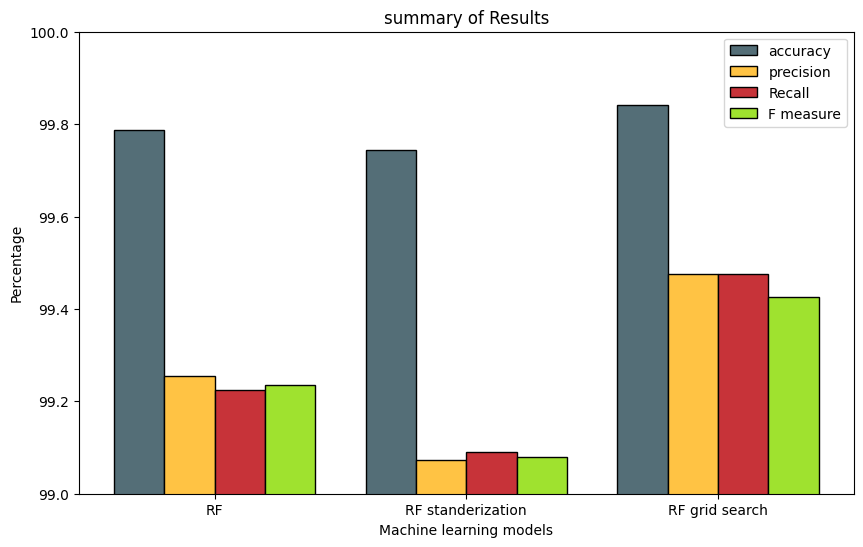

In [38]:
machine_learning_model_name = ['RF','RF standerization','RF grid search']
machine_learning_model_acc=[avg_RF_acc,avg_RF_acc_STA,RF_acc_GS]
machine_learning_model_rec = [avg_RF_rec,avg_RF_rec_STA,RF_rec_GS]
machine_learning_model_pre = [avg_RF_pre,avg_RF_pre_STA,RF_rec_GS]
machine_learning_model_F1 = [avg_RF_f1,avg_RF_f1_STA,RF_f1_GS]
X_axis = np.arange(len(machine_learning_model_name )) 

plt.figure(figsize=(10, 6))

plt.bar(X_axis+0, machine_learning_model_acc, color ="#546E77",width = 0.2,edgecolor = 'black',label = 'accuracy')
plt.bar(X_axis+0.2, machine_learning_model_pre, color ='#FFC344',width = 0.2,edgecolor = 'black',label = 'precision')
plt.bar(X_axis + 0.4, machine_learning_model_rec, color ='#C73339',width = 0.2,edgecolor = 'black',label = 'Recall')
plt.bar(X_axis + 0.6, machine_learning_model_F1, color ='#9FE22F',width = 0.2,edgecolor = 'black',label = 'F measure')
plt.xticks(X_axis+0.3, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.ylabel("Percentage")
plt.title("summary of Results")
plt.ylim(99, 100)
plt.show()

## SVM

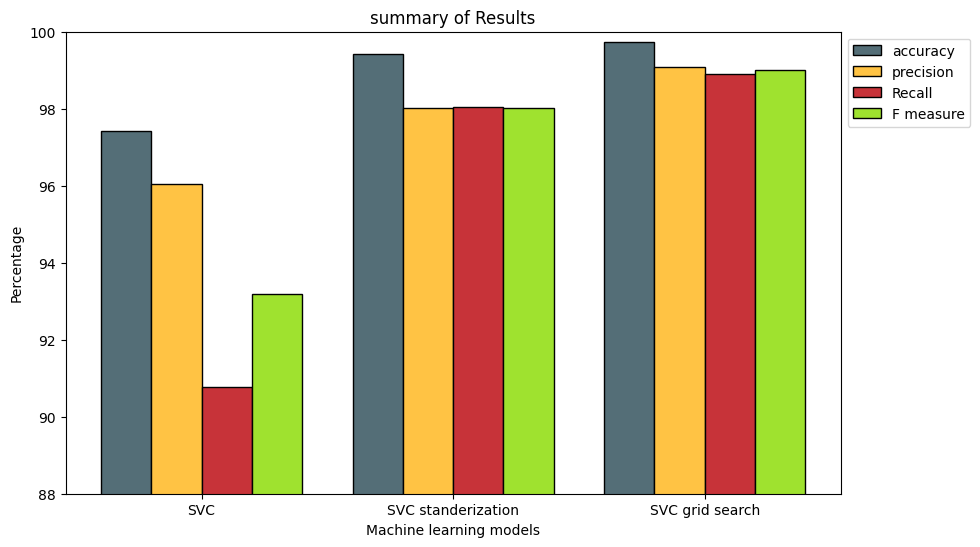

In [31]:
machine_learning_model_name = ['SVC','SVC standerization','SVC grid search']
machine_learning_model_acc=[avg_SVC_acc,avg_SVC_acc_STA,SVC_acc_GS]
machine_learning_model_rec = [avg_SVC_rec,avg_SVC_rec_STA,SVC_rec_GS]
machine_learning_model_pre = [avg_SVC_pre,avg_SVC_pre_STA,SVC_pre_GS]
machine_learning_model_F1 = [avg_SVC_f1,avg_SVC_f1_STA,SVC_f1_GS]
X_axis = np.arange(len(machine_learning_model_name )) 

plt.figure(figsize=(10, 6))

plt.bar(X_axis+0, machine_learning_model_acc, color ="#546E77",width = 0.2,edgecolor = 'black',label = 'accuracy')
plt.bar(X_axis+0.2, machine_learning_model_pre, color ='#FFC344',width = 0.2,edgecolor = 'black',label = 'precision')
plt.bar(X_axis + 0.4, machine_learning_model_rec, color ='#C73339',width = 0.2,edgecolor = 'black',label = 'Recall')
plt.bar(X_axis + 0.6, machine_learning_model_F1, color ='#9FE22F',width = 0.2,edgecolor = 'black',label = 'F measure')
plt.xticks(X_axis+0.3, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.ylabel("Percentage")
plt.title("summary of Results")
plt.ylim(88, 100)
plt.show()

## Gradient Boosting

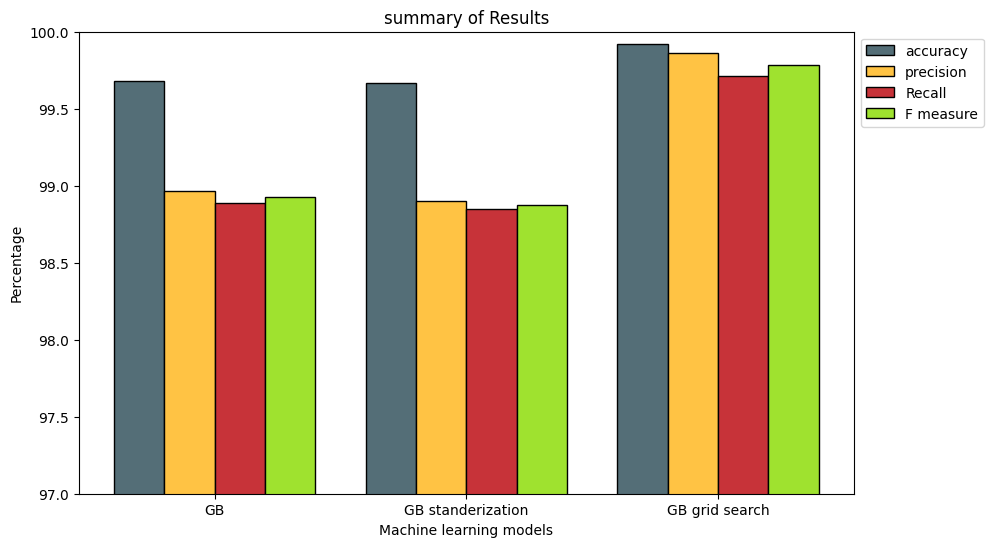

In [32]:
machine_learning_model_name = ['GB','GB standerization','GB grid search']
machine_learning_model_acc=[avg_GB_acc,avg_GB_acc_STA,GB_acc_GS]
machine_learning_model_rec = [avg_GB_rec,avg_GB_rec_STA,GB_rec_GS]
machine_learning_model_pre = [avg_GB_pre,avg_GB_pre_STA,GB_pre_GS]
machine_learning_model_F1 = [avg_GB_f1,avg_GB_f1_STA,GB_f1_GS]
X_axis = np.arange(len(machine_learning_model_name )) 

plt.figure(figsize=(10, 6))

plt.bar(X_axis+0, machine_learning_model_acc, color ="#546E77",width = 0.2,edgecolor = 'black',label = 'accuracy')
plt.bar(X_axis+0.2, machine_learning_model_pre, color ='#FFC344',width = 0.2,edgecolor = 'black',label = 'precision')
plt.bar(X_axis + 0.4, machine_learning_model_rec, color ='#C73339',width = 0.2,edgecolor = 'black',label = 'Recall')
plt.bar(X_axis + 0.6, machine_learning_model_F1, color ='#9FE22F',width = 0.2,edgecolor = 'black',label = 'F measure')
plt.xticks(X_axis+0.3, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.ylabel("Percentage")
plt.title("summary of Results")
plt.ylim(97, 100)
plt.show()

## XGB

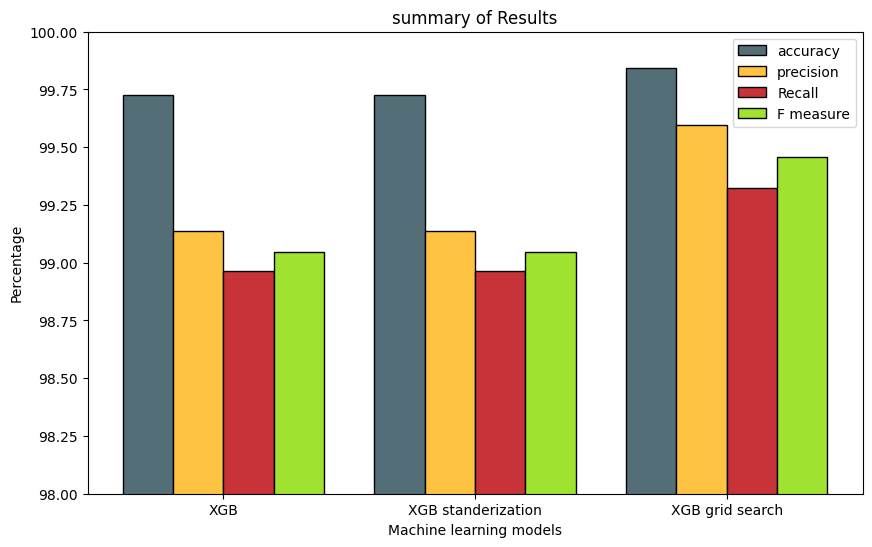

In [33]:
machine_learning_model_name = ['XGB','XGB standerization','XGB grid search']
machine_learning_model_acc=[avg_XGB_acc,avg_XGB_acc_STA,XGB_acc_GS]
machine_learning_model_rec = [avg_XGB_rec,avg_XGB_rec_STA,XGB_rec_GS]
machine_learning_model_pre = [avg_XGB_pre,avg_XGB_pre_STA,XGB_pre_GS]
machine_learning_model_F1 = [avg_XGB_f1,avg_XGB_f1_STA,XGB_f1_GS]
X_axis = np.arange(len(machine_learning_model_name )) 

plt.figure(figsize=(10, 6))

plt.bar(X_axis+0, machine_learning_model_acc, color ="#546E77",width = 0.2,edgecolor = 'black',label = 'accuracy')
plt.bar(X_axis+0.2, machine_learning_model_pre, color ='#FFC344',width = 0.2,edgecolor = 'black',label = 'precision')
plt.bar(X_axis + 0.4, machine_learning_model_rec, color ='#C73339',width = 0.2,edgecolor = 'black',label = 'Recall')
plt.bar(X_axis + 0.6, machine_learning_model_F1, color ='#9FE22F',width = 0.2,edgecolor = 'black',label = 'F measure')
plt.xticks(X_axis+0.3, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.ylabel("Percentage")
plt.title("summary of Results")
plt.ylim(98, 100)
plt.show()

## Models comparison

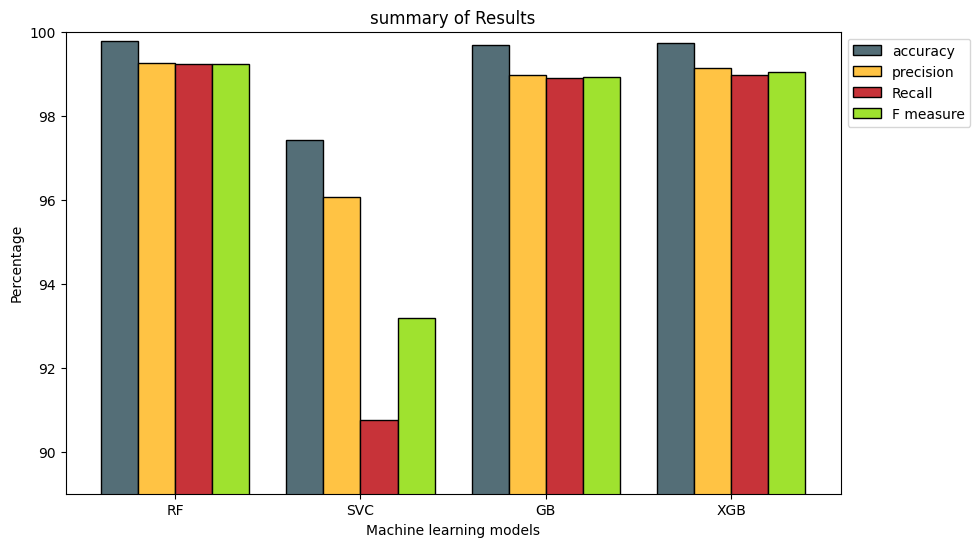

In [34]:
machine_learning_model_name = ['RF','SVC','GB','XGB']
machine_learning_model_acc=[avg_RF_acc,avg_SVC_acc,avg_GB_acc,avg_XGB_acc]
machine_learning_model_rec = [avg_RF_rec,avg_SVC_rec,avg_GB_rec,avg_XGB_rec]
machine_learning_model_pre = [avg_RF_pre,avg_SVC_pre,avg_GB_pre,avg_XGB_pre]
machine_learning_model_F1 = [avg_RF_f1,avg_SVC_f1,avg_GB_f1,avg_XGB_f1]
X_axis = np.arange(len(machine_learning_model_name )) 

plt.figure(figsize=(10, 6))

plt.bar(X_axis+0, machine_learning_model_acc, color ="#546E77",width = 0.2,edgecolor = 'black',label = 'accuracy')
plt.bar(X_axis+0.2, machine_learning_model_pre, color ='#FFC344',width = 0.2,edgecolor = 'black',label = 'precision')
plt.bar(X_axis + 0.4, machine_learning_model_rec, color ='#C73339',width = 0.2,edgecolor = 'black',label = 'Recall')
plt.bar(X_axis + 0.6, machine_learning_model_F1, color ='#9FE22F',width = 0.2,edgecolor = 'black',label = 'F measure')
plt.xticks(X_axis+0.3, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.ylabel("Percentage")
plt.title("summary of Results")
plt.ylim(89, 100)
plt.show()

## Standerization comparison

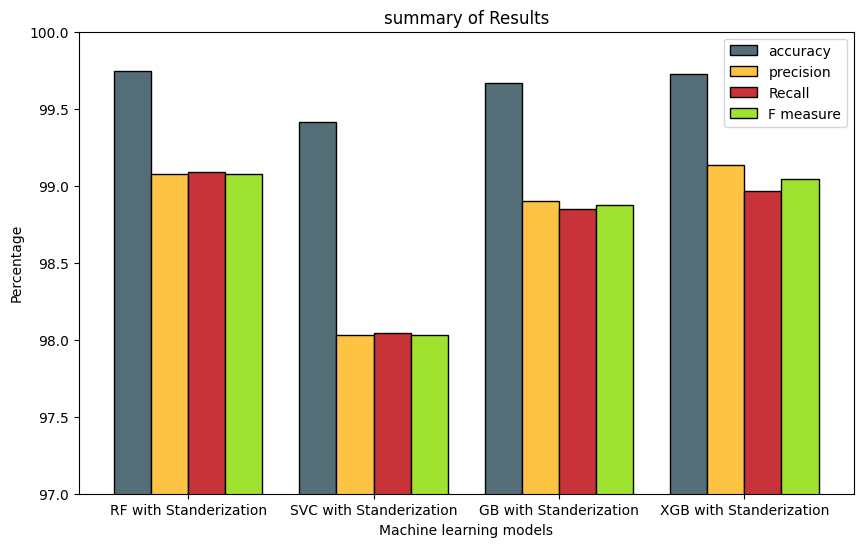

In [35]:
machine_learning_model_name = ['RF with Standerization','SVC with Standerization','GB with Standerization','XGB with Standerization']
machine_learning_model_acc=[avg_RF_acc_STA,avg_SVC_acc_STA,avg_GB_acc_STA,avg_XGB_acc_STA]
machine_learning_model_rec = [avg_RF_rec_STA,avg_SVC_rec_STA,avg_GB_rec_STA,avg_XGB_rec_STA]
machine_learning_model_pre = [avg_RF_pre_STA,avg_SVC_pre_STA,avg_GB_pre_STA,avg_XGB_pre_STA]
machine_learning_model_F1 = [avg_RF_f1_STA,avg_SVC_f1_STA,avg_GB_f1_STA,avg_XGB_f1_STA]
X_axis = np.arange(len(machine_learning_model_name )) 

plt.figure(figsize=(10, 6))

plt.bar(X_axis+0, machine_learning_model_acc, color ="#546E77",width = 0.2,edgecolor = 'black',label = 'accuracy')
plt.bar(X_axis+0.2, machine_learning_model_pre, color ='#FFC344',width = 0.2,edgecolor = 'black',label = 'precision')
plt.bar(X_axis + 0.4, machine_learning_model_rec, color ='#C73339',width = 0.2,edgecolor = 'black',label = 'Recall')
plt.bar(X_axis + 0.6, machine_learning_model_F1, color ='#9FE22F',width = 0.2,edgecolor = 'black',label = 'F measure')
plt.xticks(X_axis+0.3, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.ylabel("Percentage")
plt.title("summary of Results")
plt.ylim(97, 100)
plt.show()

## Grid search comparison

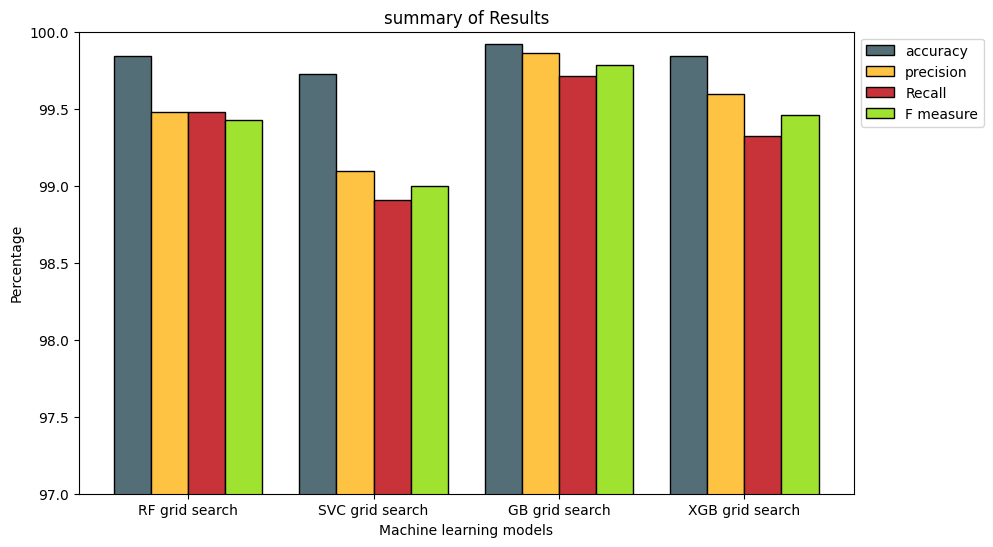

In [36]:
machine_learning_model_name = ['RF grid search','SVC grid search','GB grid search','XGB grid search']
machine_learning_model_acc=[RF_acc_GS,SVC_acc_GS,GB_acc_GS,XGB_acc_GS]
machine_learning_model_rec = [RF_rec_GS,SVC_rec_GS,GB_rec_GS,XGB_rec_GS]
machine_learning_model_pre = [RF_rec_GS,SVC_pre_GS,GB_pre_GS,XGB_pre_GS]
machine_learning_model_F1 = [RF_f1_GS,SVC_f1_GS,GB_f1_GS,XGB_f1_GS]
X_axis = np.arange(len(machine_learning_model_name )) 

plt.figure(figsize=(10, 6))

plt.bar(X_axis+0, machine_learning_model_acc, color ="#546E77",width = 0.2,edgecolor = 'black',label = 'accuracy')
plt.bar(X_axis+0.2, machine_learning_model_pre, color ='#FFC344',width = 0.2,edgecolor = 'black',label = 'precision')
plt.bar(X_axis + 0.4, machine_learning_model_rec, color ='#C73339',width = 0.2,edgecolor = 'black',label = 'Recall')
plt.bar(X_axis + 0.6, machine_learning_model_F1, color ='#9FE22F',width = 0.2,edgecolor = 'black',label = 'F measure')
plt.xticks(X_axis+0.3, machine_learning_model_name )
plt.legend(bbox_to_anchor=(1, 1))

plt.xlabel("Machine learning models")
plt.ylabel("Percentage")
plt.title("summary of Results")
plt.ylim(97, 100)
plt.show()